In [164]:
import pandas as pd
import numpy as np
import scipy
import warnings

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, accuracy_score 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
warnings.filterwarnings('ignore')

# DATA LOADING &  PREPROCESSING 

In [165]:
#LOAD DATA using pandas
data=pd.read_csv('music_dataset_mod.csv')

In [166]:
#copy data for preprocessing to avoid altering original data
df=data.copy()

In [168]:
df

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763,Country
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146,Classical
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020,Rock
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109,Hip-hop
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986,Country
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,66.578839,54.533872,99.782246,95.633310,91.414514,19.396142,36.280860,78.298955,4.890606,4.638077,75.479656,95.990077,NaN
996,126.570862,57.812829,90.809940,64.880583,40.437517,38.051344,66.204244,95.770959,1.745673,6.729019,82.042218,43.590027,Classical
997,121.731543,51.385204,33.849400,17.044544,84.483481,13.312790,8.953013,64.068960,90.738580,96.043437,5.499350,74.604889,Rock
998,97.070804,19.210429,62.662860,22.720453,66.917937,80.590809,51.403310,50.828636,68.518232,55.119045,21.781372,24.716517,Rock


# Missing Values 

In [173]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
Tempo                            0
Dynamics Range                   0
Vocal Presence                   0
Percussion Strength              0
String Instrument Detection      0
Electronic Element Presence      0
Rhythm Complexity                0
Drums Influence                  0
Distorted Guitar                 0
Metal Frequencies                0
Ambient Sound Influence          0
Instrumental Overlaps            0
Genre                          110
dtype: int64


In [174]:
# Unique genres
unique_genres = df['Genre'].nunique()
print(f"Number of unique genres: {unique_genres}")

Number of unique genres: 5


In [175]:
# Genre distribution
genre_counts = df['Genre'].value_counts()
print("Genre distribution:")
print(genre_counts)



Genre distribution:
Genre
Rock         190
Jazz         190
Country      180
Hip-hop      168
Classical    162
Name: count, dtype: int64


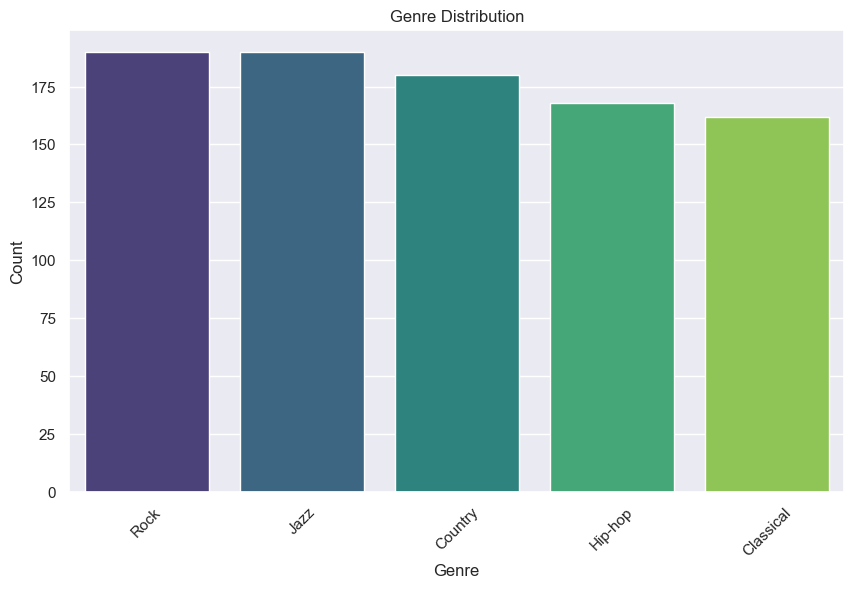

In [177]:
# Plot the genre distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="viridis")
plt.title("Genre Distribution")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

The genre distribution here shows a relatively balanced dataset across the five genres, with the counts for each genre fairly close:

Rock: 190

Jazz: 190

Country: 180

Hip-hop: 168

Classical: 162


Analysis of Balance

This distribution is reasonably balanced, which is beneficial for model training. A balanced dataset helps the model learn each genre equally well, potentially leading to better generalization across genres. Here's what this balance implies:

Lower Risk of Bias: Since each genre has similar representation, the model is less likely to be biased towards any particular genre.

No Need for Resampling: Techniques like oversampling or undersampling may not be necessary, as no genre is significantly underrepresented.

In [178]:
# Drop rows where 'Genre' is missing
df = df.dropna(subset=['Genre'])
print("Data shape after dropping rows with missing genres:", df.shape)

Data shape after dropping rows with missing genres: (890, 13)


In [179]:
df

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763,Country
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146,Classical
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020,Rock
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109,Hip-hop
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986,Country
...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,133.807084,43.093084,88.711355,38.195402,25.365896,87.613700,74.603838,87.775499,28.055663,19.389458,74.576379,59.205448,Hip-hop
996,126.570862,57.812829,90.809940,64.880583,40.437517,38.051344,66.204244,95.770959,1.745673,6.729019,82.042218,43.590027,Classical
997,121.731543,51.385204,33.849400,17.044544,84.483481,13.312790,8.953013,64.068960,90.738580,96.043437,5.499350,74.604889,Rock
998,97.070804,19.210429,62.662860,22.720453,66.917937,80.590809,51.403310,50.828636,68.518232,55.119045,21.781372,24.716517,Rock


# CORRELATION MATRIX AND HEATMAP PLOT

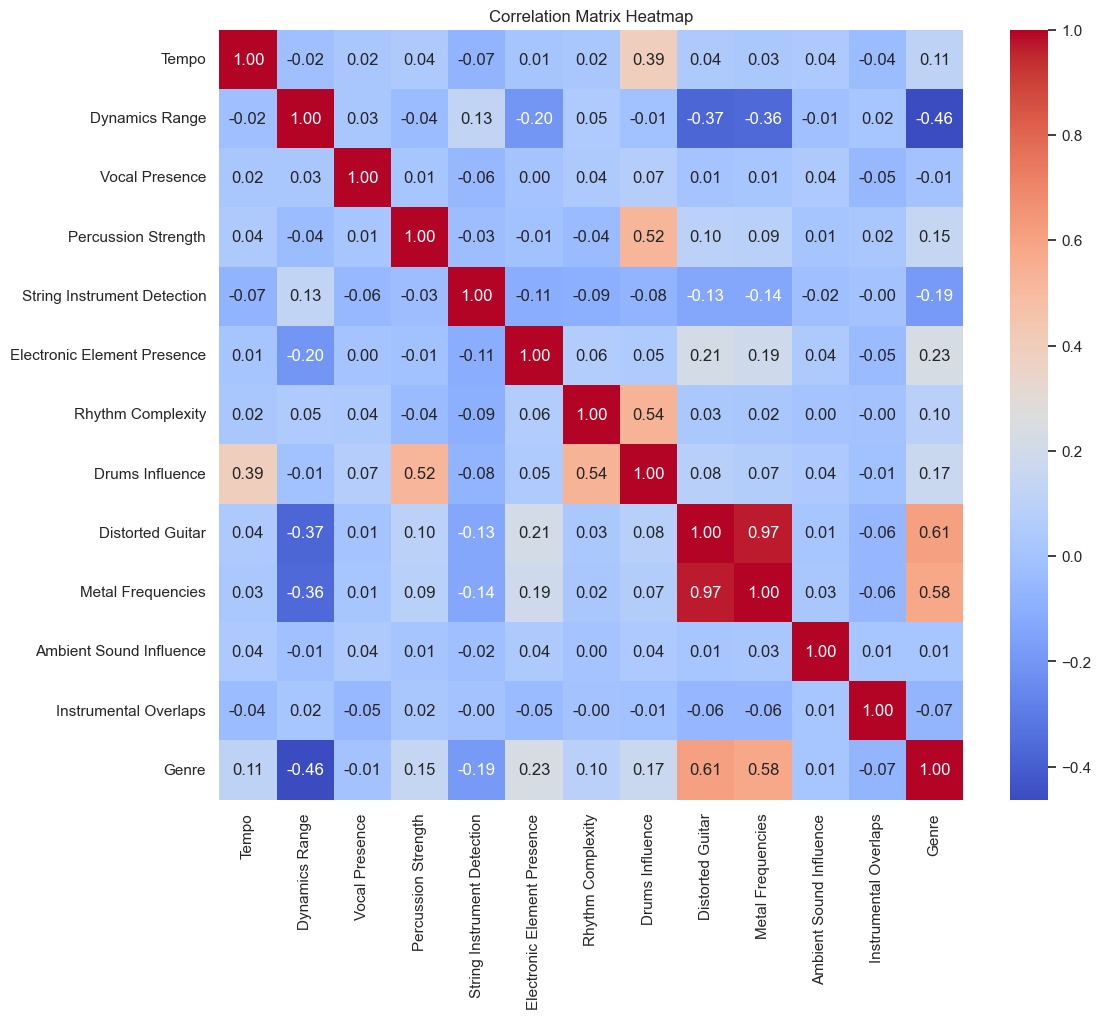

In [180]:
# Encode the target variable 'Genre'
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Genre'] = le.fit_transform(df['Genre'])

# Generate the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()


In [181]:
DATA SPLITTING, TRANSFORMATION, PRINCIPAL COMPONENT ANALYSIS FOR CLASSIFICATION

SyntaxError: invalid syntax (3536455348.py, line 1)

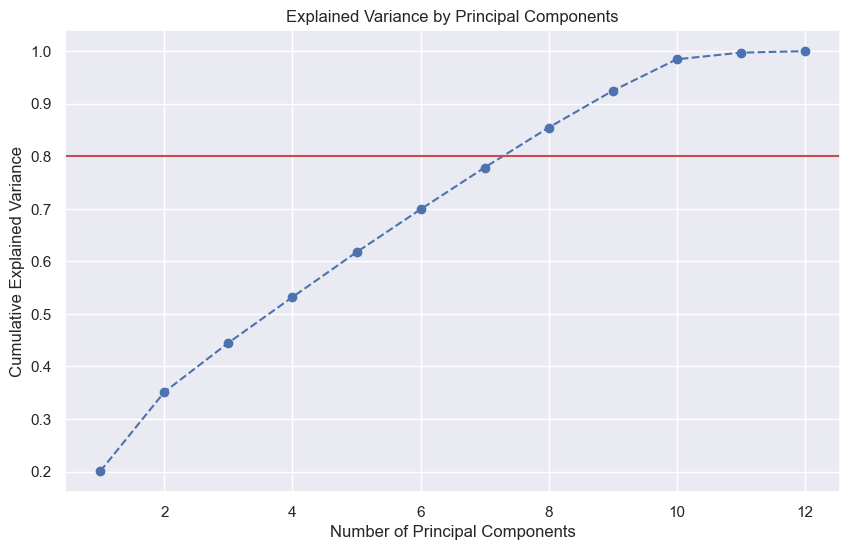

Number of components to retain at least 80% variance: 8


In [182]:
# Separate features and target
X = df.drop(columns=['Genre'])
y = df['Genre']

# Standardize the feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calculate the explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=0.8, color='r', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.show()

# Find the number of components to reach at least 80% variance
num_components = np.argmax(cumulative_variance >= 0.8) + 1
print(f"Number of components to retain at least 80% variance: {num_components}")

# USING SCALER TO TRANFORM DATA FOR pca 
TRAIN AND TEST BOTH ORIGINAL DATA & PCA TRANSFORMED DATA 

In [185]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA to reduce dimensions while retaining at least 80% of the variance
pca = PCA(n_components=0.8, svd_solver='full')
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Initialize Logistic Regression with a high max_iter
log_reg = LogisticRegression(random_state=42, max_iter=10000)

# Train and evaluate on PCA-transformed data
log_reg.fit(X_train_pca, y_train)
y_pred_pca = log_reg.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print("PCA-Transformed Data:")
print(f"Accuracy: {accuracy_pca:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_pca))

# Train and evaluate on original data
log_reg.fit(X_train_scaled, y_train)
y_pred_original = log_reg.predict(X_test_scaled)
accuracy_original = accuracy_score(y_test, y_pred_original)
print("\nOriginal Data:")
print(f"Accuracy: {accuracy_original:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_original))

PCA-Transformed Data:
Accuracy: 0.54
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92        49
           1       0.45      0.33      0.38        54
           2       0.39      0.38      0.38        50
           3       0.41      0.35      0.38        57
           4       0.54      0.70      0.61        57

    accuracy                           0.54       267
   macro avg       0.53      0.55      0.54       267
weighted avg       0.53      0.54      0.53       267


Original Data:
Accuracy: 0.58
Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93        49
           1       0.49      0.31      0.38        54
           2       0.47      0.48      0.48        50
           3       0.46      0.44      0.45        57
           4       0.58      0.72      0.64        57

    accuracy                           0.58       267
   macro avg     

In [186]:
data

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763,Country
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146,Classical
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020,Rock
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109,Hip-hop
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986,Country
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,66.578839,54.533872,99.782246,95.633310,91.414514,19.396142,36.280860,78.298955,4.890606,4.638077,75.479656,95.990077,NaN
996,126.570862,57.812829,90.809940,64.880583,40.437517,38.051344,66.204244,95.770959,1.745673,6.729019,82.042218,43.590027,Classical
997,121.731543,51.385204,33.849400,17.044544,84.483481,13.312790,8.953013,64.068960,90.738580,96.043437,5.499350,74.604889,Rock
998,97.070804,19.210429,62.662860,22.720453,66.917937,80.590809,51.403310,50.828636,68.518232,55.119045,21.781372,24.716517,Rock


# SEPRATING MISSING DATA IN GENRE 
THEN USE LOGISTIC REGRESSION TO PREDICT THE MISSING VALUE

In [187]:
# Separate rows with missing genres and rows with known genres
df_missing_genres = data[data['Genre'].isna()]
df_known_genres = data.dropna(subset=['Genre'])

# Encode the known genres
le = LabelEncoder()
df_known_genres['Genre'] = le.fit_transform(df_known_genres['Genre'])

# Separate features and target for known genres
X_known = df_known_genres.drop(columns=['Genre', 'Genre'])
y_known = df_known_genres['Genre']

# Standardize the feature data
scaler = StandardScaler()
X_known_scaled = scaler.fit_transform(X_known)

# Train logistic regression on original data
log_reg = LogisticRegression(random_state=42, max_iter=10000)
log_reg.fit(X_known_scaled, y_known)

# Prepare data for rows with missing genres
X_missing = df_missing_genres.drop(columns=['Genre'])
X_missing_scaled = scaler.transform(X_missing)

# Predict missing genres using the original data model
genre_predictions = log_reg.predict(X_missing_scaled)

# Map encoded predictions back to original genre labels
label_mapping = {index: label for index, label in enumerate(le.classes_)}
genre_labels = [label_mapping[pred] for pred in genre_predictions]

# Verify the length of the predictions matches the number of missing values
missing_genre_count = data['Genre'].isna().sum()

if len(genre_labels) == missing_genre_count:
    # Fill the missing 'Genre' values in the original DataFrame
    data.loc[data['Genre'].isna(), 'Genre'] = genre_labels
else:
    print("Error: The number of predicted labels does not match the number of missing values in 'Genre'.")

# Verify if missing values are filled
print("Number of missing values in 'Genre' column after filling:", df['Genre'].isna().sum())
print(data.head())


Number of missing values in 'Genre' column after filling: 0
        Tempo  Dynamics Range  Vocal Presence  Percussion Strength  \
0  114.618354       57.976367       53.251766            99.061840   
1  116.672803       69.387087       95.787280            90.831033   
2  128.328121       52.930677       65.701187           104.439247   
3  128.511337       25.494755       14.095374            40.106130   
4  135.474190       45.174876      101.469872            70.002203   

   String Instrument Detection  Electronic Element Presence  \
0                    14.686768                    17.628630   
1                    47.280419                   -15.618194   
2                     5.984994                    50.467388   
3                    47.715584                    87.335201   
4                   108.177637                    25.865590   

   Rhythm Complexity  Drums Influence  Distorted Guitar  Metal Frequencies  \
0          46.545522        75.839434         79.378892       

In [189]:
data.tail(10)

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
990,145.665597,28.642070,52.657254,7.204516,94.165273,7.130571,78.159682,73.616978,94.777354,93.121865,46.236654,77.689609,Rock
991,130.719110,65.990957,21.775950,91.817048,34.029452,105.525736,28.552899,99.587397,1.414556,0.000000,59.447447,74.901837,Hip-hop
992,117.892313,35.001524,76.506358,77.972570,80.765657,13.759213,59.985923,80.108786,93.831262,100.000000,15.851851,47.984445,Rock
993,104.315096,26.173723,3.334345,42.132602,38.434513,66.522798,62.051560,79.475348,61.390214,52.925363,50.383816,52.630256,Jazz
994,121.863373,50.872678,70.100162,106.212013,66.573813,89.927526,3.009635,79.634816,15.398297,31.235519,11.997421,57.281283,Hip-hop
995,66.578839,54.533872,99.782246,95.633310,91.414514,19.396142,36.280860,78.298955,4.890606,4.638077,75.479656,95.990077,Classical
996,126.570862,57.812829,90.809940,64.880583,40.437517,38.051344,66.204244,95.770959,1.745673,6.729019,82.042218,43.590027,Classical
997,121.731543,51.385204,33.849400,17.044544,84.483481,13.312790,8.953013,64.068960,90.738580,96.043437,5.499350,74.604889,Rock
998,97.070804,19.210429,62.662860,22.720453,66.917937,80.590809,51.403310,50.828636,68.518232,55.119045,21.781372,24.716517,Rock
999,71.050781,32.967250,62.875776,78.868747,88.094454,59.148014,83.420324,59.582109,37.329193,44.576693,87.458414,78.270683,Jazz


In [190]:
# Genre distribution
genre_counts = data['Genre'].value_counts()
print("Genre distribution:")
print(genre_counts)


Genre distribution:
Genre
Rock         218
Jazz         209
Country      203
Classical    186
Hip-hop      184
Name: count, dtype: int64


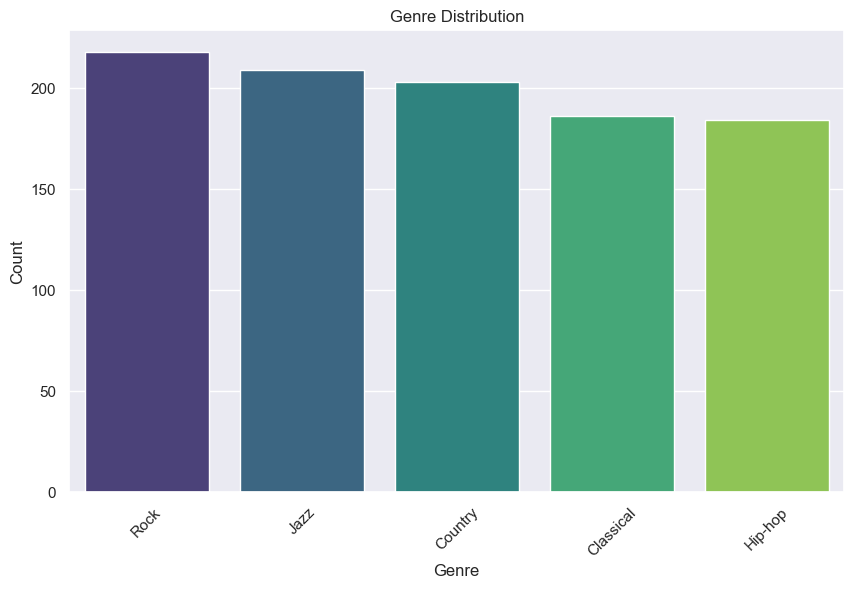

In [139]:
# Plot the genre distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="viridis")
plt.title("Genre Distribution")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

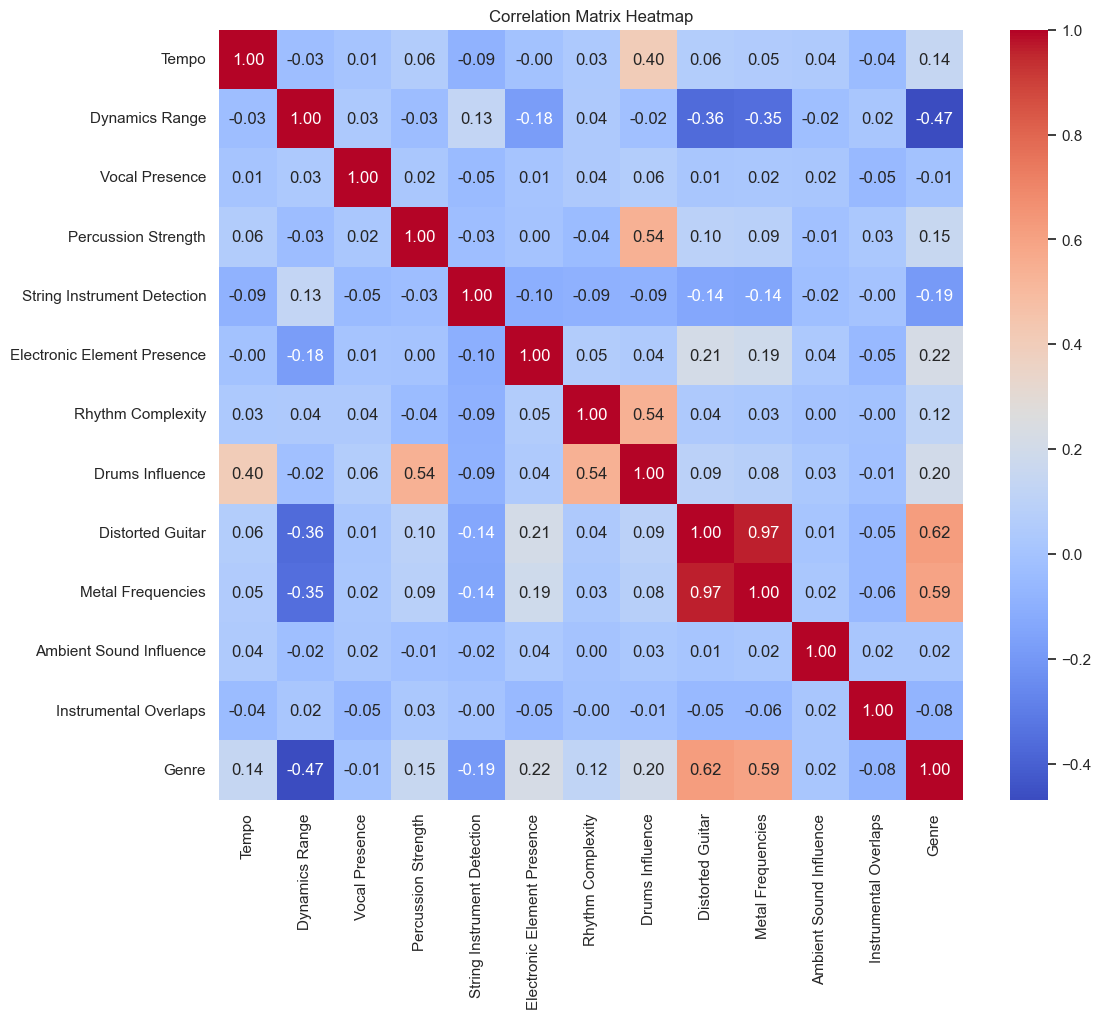

In [191]:
# Encode the target variable 'Genre'
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Genre'] = le.fit_transform(data['Genre'])

# Generate the correlation matrix
correlation_matrix = data.corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

# TRAIN AND TEST SPLIT FOR CLASIFICATION ALGORITHMN

In [196]:
# Separate features and target
X = data.drop(columns=['Genre'])
y = data['Genre']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize Logistic Regression with a high max_iter
log_reg = LogisticRegression(random_state=42, max_iter=10000)

# Train and evaluate on original data
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
accuracy= accuracy_score(y_test, y_pred)
print("\nOriginal Data:")
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


Original Data:
Accuracy: 0.58
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.96        56
           1       0.43      0.46      0.44        61
           2       0.51      0.44      0.47        55
           3       0.57      0.41      0.48        63
           4       0.59      0.75      0.66        65

    accuracy                           0.61       300
   macro avg       0.61      0.61      0.60       300
weighted avg       0.60      0.61      0.60       300



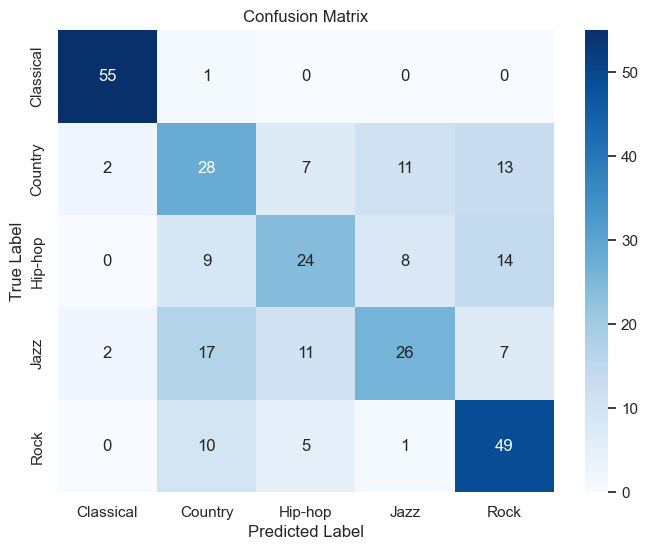

In [197]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [198]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the model
model_RF = RandomForestClassifier(random_state=42)
model_RF.fit(X_train, y_train)

# Make predictions on the test set
RFy_pred = model_RF.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, RFy_pred)

# Print results
print("\nOriginal Data:")
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, RFy_pred))



Original Data:
Accuracy: 0.61
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.96        56
           1       0.43      0.46      0.44        61
           2       0.51      0.44      0.47        55
           3       0.57      0.41      0.48        63
           4       0.59      0.75      0.66        65

    accuracy                           0.61       300
   macro avg       0.61      0.61      0.60       300
weighted avg       0.60      0.61      0.60       300



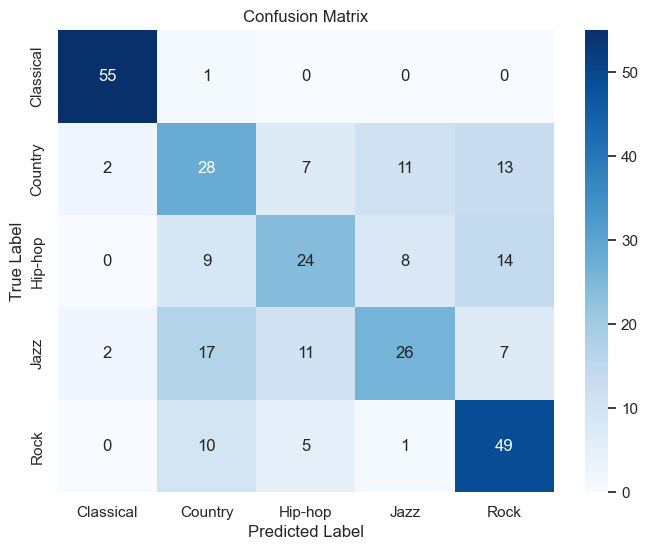

In [199]:
conf_matrix = confusion_matrix(y_test, RFy_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [200]:
# Dictionary to store accuracy results
accuracy_results = {}

# Naive Bayes Model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_y_pred = nb_model.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_y_pred)
accuracy_results['Naive Bayes'] = nb_accuracy

# Random Forest Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
accuracy_results['Random Forest'] = rf_accuracy

# XGBoost Model
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_y_pred = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
accuracy_results['XGBoost'] = xgb_accuracy

# Support Vector Machine Model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
svm_y_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_y_pred)
accuracy_results['SVM'] = svm_accuracy

# Create DataFrame to display results
accuracy_df = pd.DataFrame(list(accuracy_results.items()), columns=['Model', 'Accuracy'])

# Print accuracy results table
print("\nAccuracy Comparison Table:")
print(accuracy_df)


Accuracy Comparison Table:
           Model  Accuracy
0    Naive Bayes  0.586667
1  Random Forest  0.606667
2        XGBoost  0.606667
3            SVM  0.573333


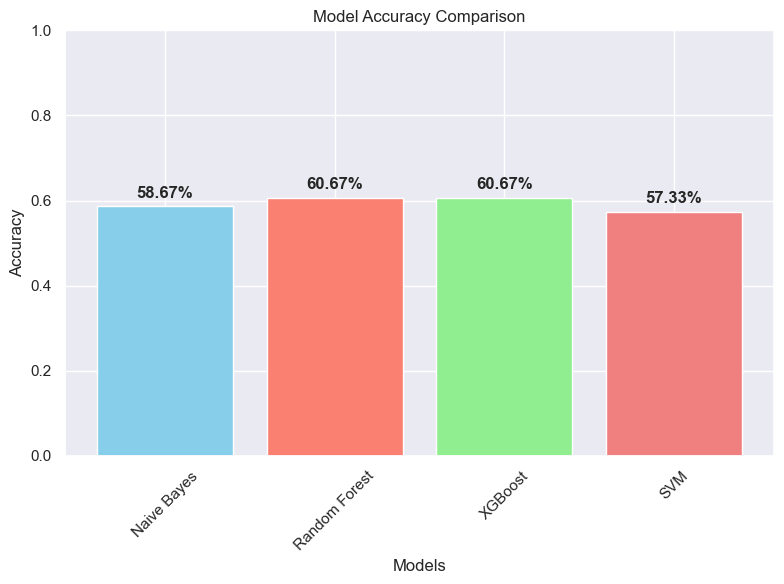

In [202]:
import matplotlib.pyplot as plt

# Data
models = ['Naive Bayes', 'Random Forest', 'XGBoost', 'SVM']
accuracies = [0.5867, 0.6067, 0.6067, 0.5733]

# Create the bar chart
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['skyblue', 'salmon', 'lightgreen', 'lightcoral'])
plt.ylim(0, 1)  # Set y-axis limit to 0-1 to represent accuracy as a percentage

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)  # Rotate model names for better readability

# Add accuracy values on top of bars
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.02, f"{v*100:.2f}%", ha='center', fontweight='bold')

# Display the chart
plt.tight_layout()
plt.show()


# Conclusion & Recommendation

Objective
To identify the best-performing model for our classification analysis based on accuracy metrics. This comparison will help guide our decision on which model to deploy for the project.

1. Summary of Model Performance
Model	Accuracy

Naive Bayes	58.67%

Random Forest	60.67%

XGBoost	60.67%

SVM	57.33%

2. Key Insights
Top Performers: Random Forest and XGBoost models achieved the highest accuracy, each reaching 60.67%. Both models perform slightly better than the others, making them top candidates.

Naive Bayes and SVM: These models showed slightly lower accuracy, at 58.67% and 57.33%, respectively. However, they still present valuable insights and could be considered in ensemble approaches or for further tuning.

3. Visual Comparison (suggested visualization)
A bar chart displaying each model’s accuracy could quickly show differences:

Model	Accuracy (%)

Naive Bayes	58.67

Random Forest	60.67

XGBoost	60.67

SVM	57.33

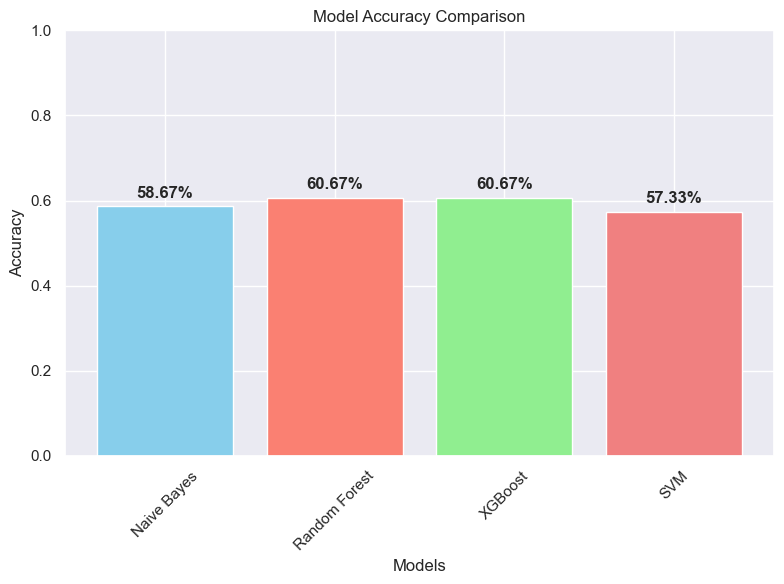

4. Recommendations
Select Random Forest or XGBoost as the primary model for deployment due to their competitive performance and scalability.

Further Tuning: Additional hyperparameter tuning on Random Forest and XGBoost may yield even better results.

Consider Ensembling: An ensemble method combining Random Forest and XGBoost could capitalize on both models' strengths for potentially improved accuracy.

# Final Note




Here is the final result after the missing class has been preeicted using PCA

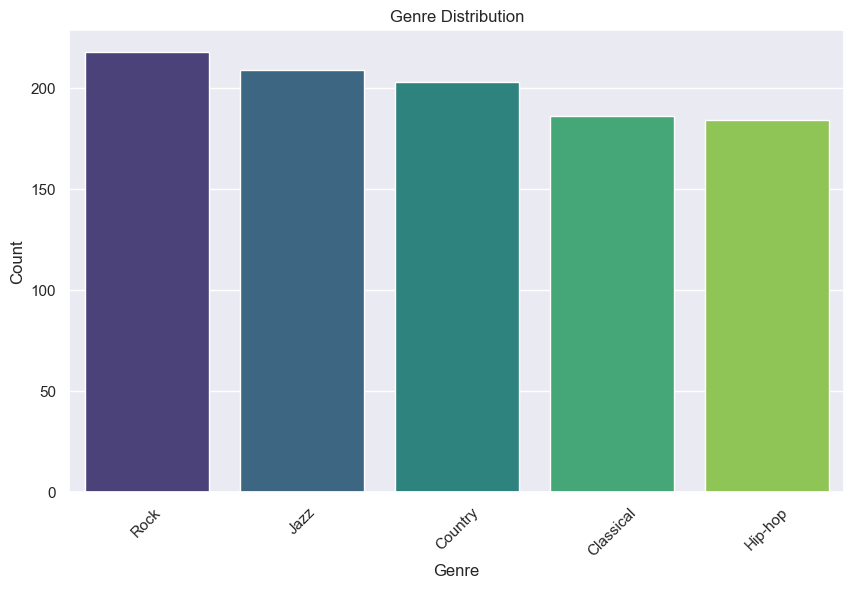